In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
TRAINING_DIR = "tmp/Medicinal-Leaf-Images/Train/"
training_datagen = ImageDataGenerator(rescale = 1/255,
                                      rotation_range = 40,
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True,
                                      fill_mode = "nearest")

VALIDATION_DIR = "tmp/Medicinal-Leaf-Images/Validation/"
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                       target_size = (300, 300),
                                                       class_mode = 'categorical',
                                                       batch_size = 85
                                                       )

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size = (300, 300),
                                                              class_mode = "categorical",
                                                              batch_size = 40)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(30, activation='softmax')
])

model.summary()

Found 1647 images belonging to 30 classes.
Found 188 images belonging to 30 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_____________________________________

In [3]:
model.compile(loss = "categorical_crossentropy",
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

training_model = model.fit(train_generator, 
                           epochs = 110,
                           steps_per_epoch = 20,
                           validation_data = validation_generator,
                           validation_steps = 5,
                           verbose = 2)

Epoch 1/110
20/20 - 307s - loss: 4.7725 - accuracy: 0.0540 - val_loss: 3.3413 - val_accuracy: 0.0691
Epoch 2/110
20/20 - 306s - loss: 3.2515 - accuracy: 0.0753 - val_loss: 3.9648 - val_accuracy: 0.0372
Epoch 3/110
20/20 - 307s - loss: 3.1560 - accuracy: 0.1075 - val_loss: 2.8693 - val_accuracy: 0.1117
Epoch 4/110
20/20 - 303s - loss: 2.9987 - accuracy: 0.1184 - val_loss: 6.2954 - val_accuracy: 0.0638
Epoch 5/110
20/20 - 302s - loss: 3.0254 - accuracy: 0.1609 - val_loss: 2.8699 - val_accuracy: 0.1862
Epoch 6/110
20/20 - 303s - loss: 2.7356 - accuracy: 0.1888 - val_loss: 2.9155 - val_accuracy: 0.2074
Epoch 7/110
20/20 - 304s - loss: 2.6844 - accuracy: 0.2101 - val_loss: 2.2967 - val_accuracy: 0.2872
Epoch 8/110
20/20 - 305s - loss: 2.5272 - accuracy: 0.2508 - val_loss: 2.3154 - val_accuracy: 0.3032
Epoch 9/110
20/20 - 304s - loss: 2.3256 - accuracy: 0.2914 - val_loss: 3.2546 - val_accuracy: 0.1862
Epoch 10/110
20/20 - 380s - loss: 2.3559 - accuracy: 0.2975 - val_loss: 2.1698 - val_accura

Epoch 82/110
20/20 - 245s - loss: 0.2592 - accuracy: 0.9247 - val_loss: 0.5240 - val_accuracy: 0.8351
Epoch 83/110
20/20 - 246s - loss: 0.3065 - accuracy: 0.8962 - val_loss: 0.2018 - val_accuracy: 0.9521
Epoch 84/110
20/20 - 246s - loss: 0.3495 - accuracy: 0.8956 - val_loss: 0.4631 - val_accuracy: 0.8883
Epoch 85/110
20/20 - 246s - loss: 0.3200 - accuracy: 0.8974 - val_loss: 0.5464 - val_accuracy: 0.8404
Epoch 86/110
20/20 - 246s - loss: 0.3496 - accuracy: 0.9047 - val_loss: 0.4962 - val_accuracy: 0.8830
Epoch 87/110
20/20 - 246s - loss: 0.3274 - accuracy: 0.9101 - val_loss: 0.6545 - val_accuracy: 0.8564
Epoch 88/110
20/20 - 245s - loss: 0.3108 - accuracy: 0.8980 - val_loss: 0.1247 - val_accuracy: 0.9681
Epoch 89/110
20/20 - 248s - loss: 0.2781 - accuracy: 0.9144 - val_loss: 0.2077 - val_accuracy: 0.9521
Epoch 90/110
20/20 - 247s - loss: 0.2933 - accuracy: 0.9120 - val_loss: 0.2356 - val_accuracy: 0.9362
Epoch 91/110
20/20 - 246s - loss: 0.3336 - accuracy: 0.8852 - val_loss: 0.1559 - v

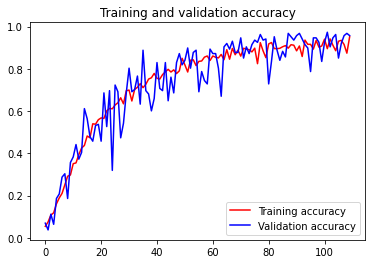

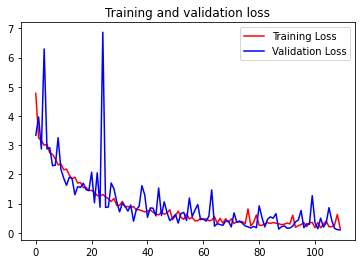

In [4]:
import matplotlib.pyplot as plt
acc = training_model.history['accuracy']
val_acc = training_model.history['val_accuracy']
loss = training_model.history['loss']
val_loss = training_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [5]:
export_dir = "tmp/saved_model"
tf.saved_model.save(model, export_dir)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: tmp/saved_model\assets


In [6]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [7]:
import pathlib
tflite_model_file = pathlib.Path('/tmp/detect.tflite')
tflite_model_file.write_bytes(tflite_model)

134947368